In [5]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
# get current working directory
import os
os.getcwd()

'/Users/kaishuenneo/Documents/sie533_fundamentals_of_data_science/github_linear_regression'

In [13]:
# import dataset
df = pd.read_csv('Murder.csv')

In [15]:
df.head()

,Population,Income,Illiteracy,Frost,Murder
0,3615,3624,2.1,20,15.1
1,365,6315,1.5,152,11.3
2,2212,4530,1.8,15,7.8
3,2110,3378,1.9,65,10.1
4,21198,5114,1.1,20,10.3


In [19]:
df.shape

(50, 5)

In [23]:
# check for null values
df.isnull().any()

Population    False
Income        False
Illiteracy    False
Frost         False
Murder        False
dtype: bool

In [25]:
# split data into training & test sets
train, test = train_test_split(df, test_size = 0.1, random_state = 0)
print('Size of training dataset: ', train.shape)
print('Size of test dataset: ', test.shape)

Size of training dataset:  (45, 5)
Size of test dataset:  (5, 5)


In [27]:
# assign the features (x) and labels (y) accordingly

# let x in the training set be the variables without the Murder
# let y in the training set be Murder
x_train = train.iloc[:, :-1]
y_train = train['Murder']

# let x in the test set be the variables without the Murder
# let y in the test set be Murder
x_test = test.iloc[:, :-1]
y_test = test['Murder']

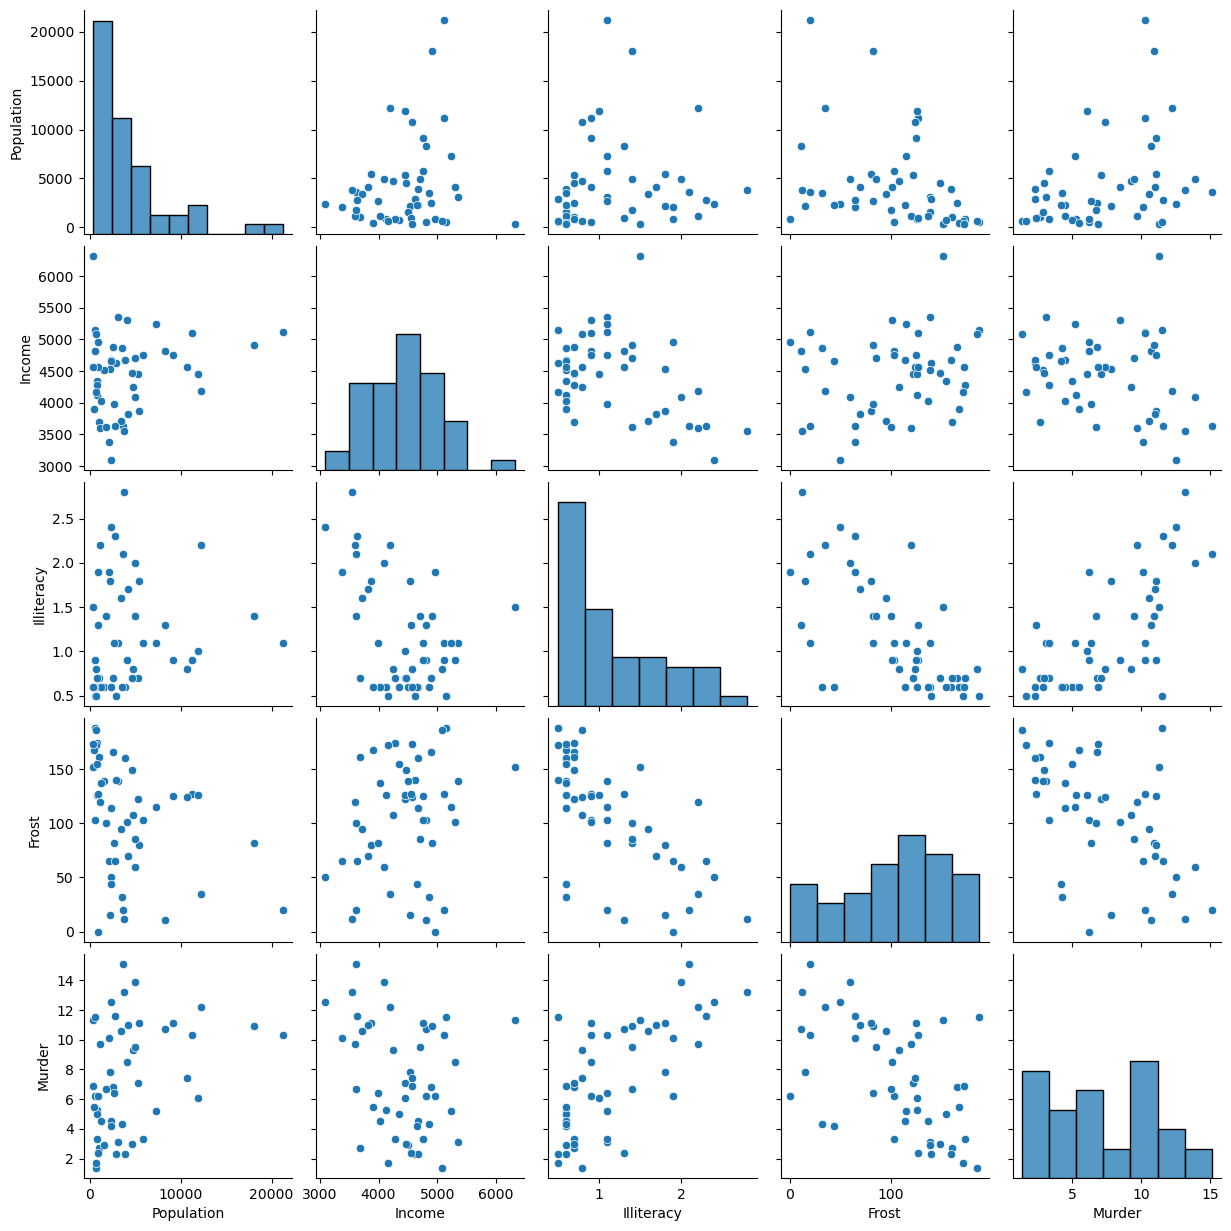

In [31]:
# data visualizations
# plot pairwise scatterplot
sns.pairplot(df)

# there exists some relationship between illiteracy and income
# a lower income may indicate higher illiteracy 

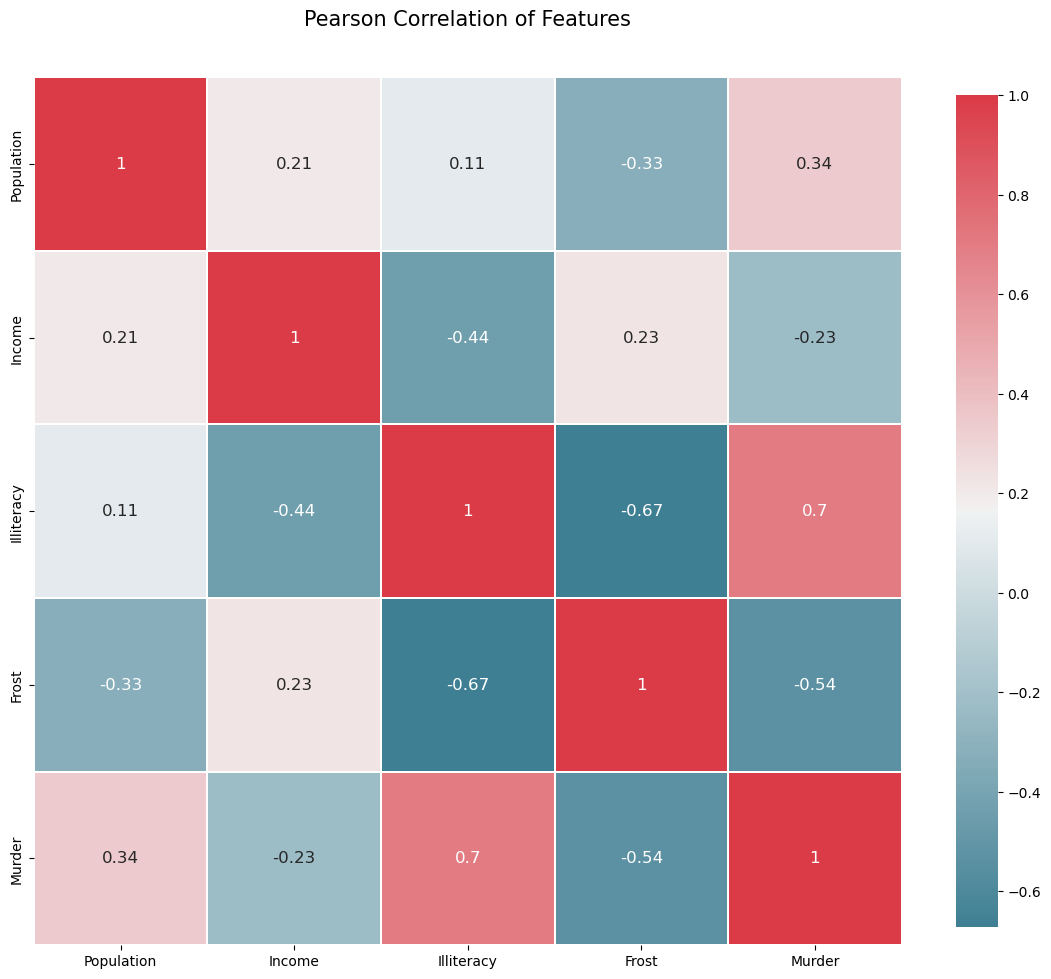

In [39]:
# data visualizations
# plot correlation heatmap

def correlation_heatmap(data):
    _ , ax = plt.subplots(figsize =(14, 12)) 
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    sns.heatmap(
        data.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,
        vmax=1.0, 
        linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.show()
    
correlation_heatmap(df)

In [43]:
# fit linear regression to training data
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
print('Intercept estimated by Sklearn: ', linear_regression.intercept_)
print('Coefficients estimated by Sklearn: ', linear_regression.coef_)

Intercept estimated by Sklearn:  0.08882509778158187
Coefficients estimated by Sklearn:  [ 1.57332864e-04  5.57564463e-04  4.24966988e+00 -6.69565249e-03]


In [49]:
# check statistical properties of model
# check significance of parameters
import statsmodels.api as sm
lr = sm.OLS(y_train, x_train)
lr = lr.fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Murder   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              111.7
Date:                Fri, 28 Feb 2025   Prob (F-statistic):                    1.79e-21
Time:                        08:31:25   Log-Likelihood:                         -103.59
No. Observations:                  45   AIC:                                      215.2
Df Residuals:                      41   BIC:                                      222.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
# upon fitting the model using x_train, use the fitted model to make predictions based on x_test
y_predict = linear_regression.predict(x_test)


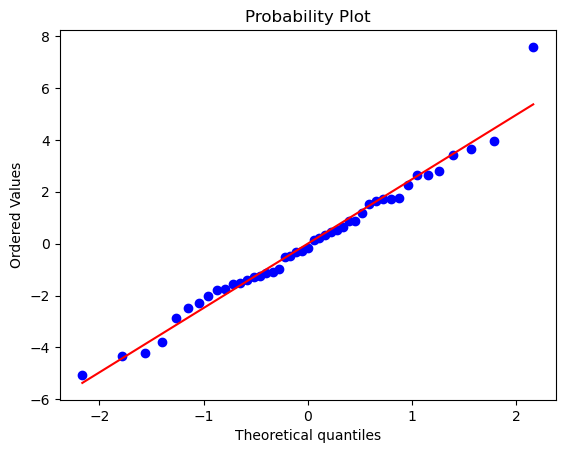

In [61]:
# ensure that the linear regression model assumption is met
# 3 assumptions in linear regression

# QQ plot
stats.probplot(y_train - linear_regression.predict(x_train), dist="norm", plot=plt)
plt.show()

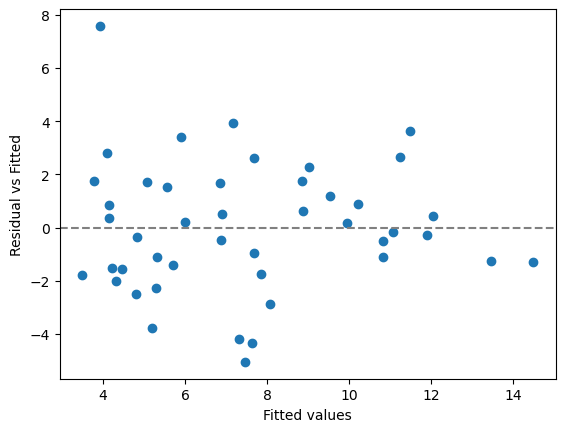

In [63]:
# residual vs fitted plot
residuals = y_train - linear_regression.predict(x_train)
plt.scatter(linear_regression.predict(x_train), residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residual vs Fitted')
plt.axhline(y=0, color='grey', ls='--')
plt.show()

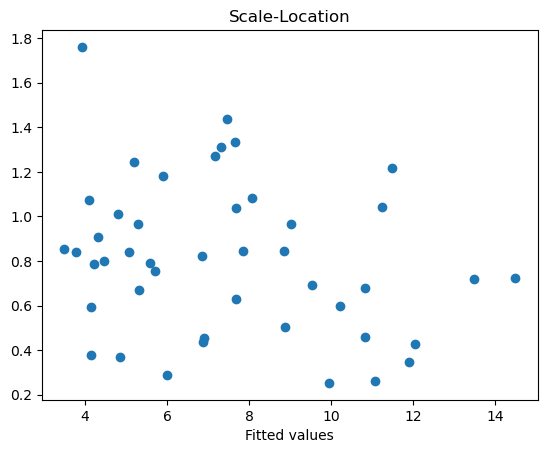

In [65]:
# scale location plot
standardized_residuals = (residuals - residuals.mean()) / residuals.std()
plt.scatter(linear_regression.predict(x_train), np.sqrt(abs(standardized_residuals)))
plt.xlabel('Fitted values')
plt.title('Scale-Location')
plt.show()

In [67]:
# compare true values vs predicted values
# create df with 2 columns
# one being the real value from testing dataset
# the other being the predicted values based on regression model
compare = pd.DataFrame({'Real Value': y_test, 'Predict Value': y_predict})
compare.reset_index(inplace = True)
compare = compare.drop(['index'], axis = 1)
compare.head()


,Real Value,Predict Value
0,3.3,4.413238
1,5.3,4.219494
2,6.2,11.066955
3,11.0,9.631572
4,7.8,10.511583


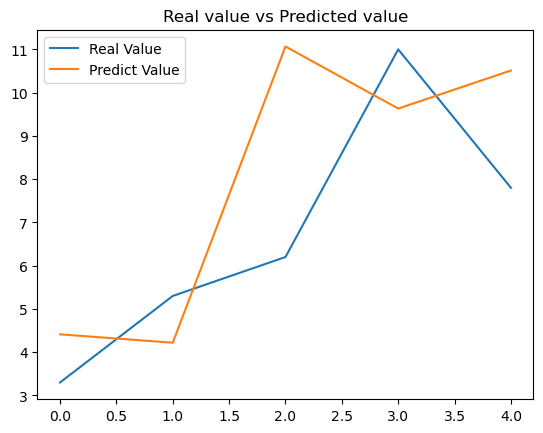

In [69]:
# visualize true values vs predicted values
compare.plot()
plt.title('Real value vs Predicted value')
plt.show()


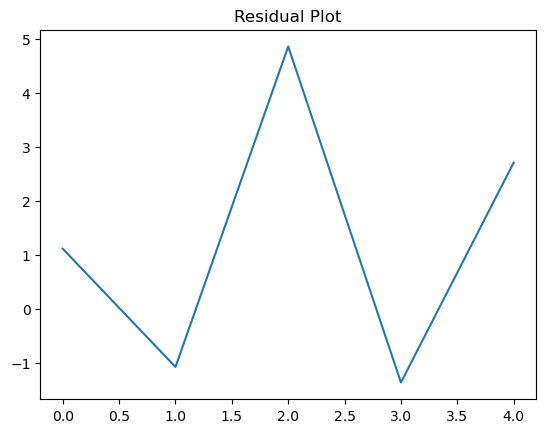

In [71]:
# plot residuals in test dataset
plt.plot(compare['Predict Value'] - compare['Real Value'])
plt.title('Residual Plot')
plt.show()

In [77]:
# calculate R^2 to evaluate goodness-of-fit

# function that calculates R^2
def R2(x_train_, y_train_):
    linear_regression.fit(x_train_, y_train_)
    LRS_ = linear_regression.score(x_train_, y_train_)
    print('R^2 calculated by library is: ', LRS_)
    return LRS_

print('Murder = w0 + w1*Population')
r1 = R2(x_train[['Population']], y_train)
print('-'*40)
print('Murder = w0 + w1*Population + w2*Illiteracy')
r2 = R2(x_train[['Population', 'Illiteracy']], y_train)
print('-'*40)
print('Murder = w0 + w1*Population + w2*Income + w3*Illiteracy')
r3 = R2(x_train[['Population', 'Income', 'Illiteracy']], y_train)
print('-'*40)
print('Murder = w0 + w1*Population + w2*Income + w3*Illiteracy + w4*Frost')
r4 = R2(x_train, y_train)
print('-'*40)

Murder = w0 + w1*Population
R^2 calculated by library is:  0.10811420164682028
----------------------------------------
Murder = w0 + w1*Population + w2*Illiteracy
R^2 calculated by library is:  0.5751728169590675
----------------------------------------
Murder = w0 + w1*Population + w2*Income + w3*Illiteracy
R^2 calculated by library is:  0.5798822601489421
----------------------------------------
Murder = w0 + w1*Population + w2*Income + w3*Illiteracy + w4*Frost
R^2 calculated by library is:  0.5834646928191469
----------------------------------------


In [79]:
# calculate Adjusted R^2 to evaluate goodness-of-fit

def AdjR2(x_train_, y_train_, r_squared):
    adjusted_r_squared_ = 1 - (1-r_squared)*(len(y_train_)-1)/(len(y_train_)-x_train_.shape[1]-1)
    print('Adjusted R^2 is ', adjusted_r_squared_)

print('Murder = w0 + w1*Population')
adjR1 = AdjR2(x_train[['Population']], y_train, r1)
print('-'*40)
print('Murder = w0 + w1*Population + w2*Illiteracy')
adjR2 = AdjR2(x_train[['Population', 'Illiteracy']], y_train, r2)
print('-'*40)
print('Murder = w0 + w1*Population + w2*Income + w3*Illiteracy')
adjR3 = AdjR2(x_train[['Population', 'Income', 'Illiteracy']], y_train, r3)
print('-'*40)
print('Murder = w0 + w1*Population + w2*Income + w3*Illiteracy + w4*Frost')
adjR4 = AdjR2(x_train, y_train, r4)
print('-'*40)

Murder = w0 + w1*Population
Adjusted R^2 is  0.08737267145256034
----------------------------------------
Murder = w0 + w1*Population + w2*Illiteracy
Adjusted R^2 is  0.5549429510999755
----------------------------------------
Murder = w0 + w1*Population + w2*Income + w3*Illiteracy
Adjusted R^2 is  0.5491419377208158
----------------------------------------
Murder = w0 + w1*Population + w2*Income + w3*Illiteracy + w4*Frost
Adjusted R^2 is  0.5418111621010616
----------------------------------------
